<a href="https://colab.research.google.com/github/IvanKatorgin/math-for-DS/blob/main/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_DS_%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Математика для Data Science". Итоговая работа. Каторгин И.П.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
### YOUR CODE HERE

In [ ]:
from sympy import *

In [ ]:
x = Symbol('x')

In [ ]:
y = tan(sin(x) + cos(2*x + 3))**2

In [ ]:
yprime = y.diff(x)

In [ ]:
yprime

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
yprime.subs(x, 1).evalf()

55.3859176353379

In [ ]:
# можно еще и так
f = lambdify(x, yprime, 'numpy')
f(np.ones(1))

array([55.38591764])

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

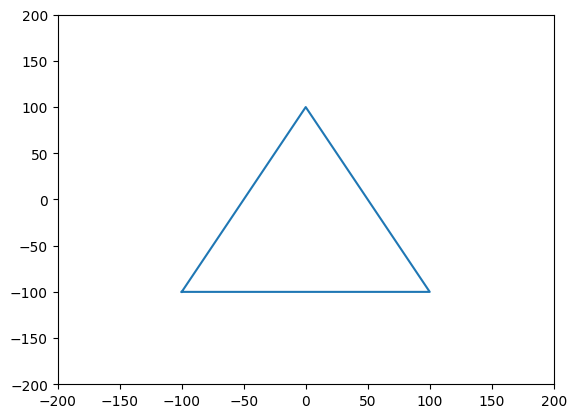

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


In [ ]:
### YOUR CODE HERE

In [ ]:
# Масштабирование на (0.5, 1.2):
B = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])

(-200.0, 300.0)

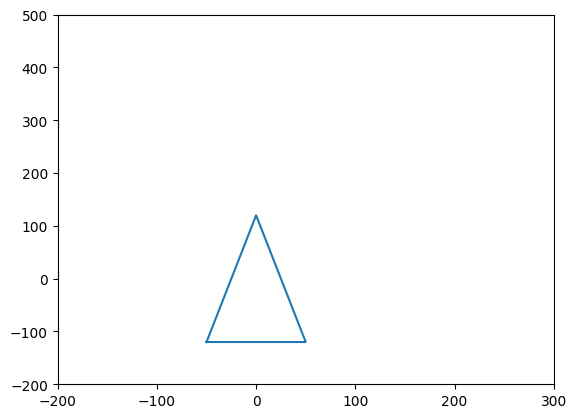

In [ ]:
res = np.dot(B, A.T)
res = res.T

res = np.array(res)

x = res[:,0]
y = res[:,1]
plt.plot(x, y)
#plt.ylim([-200, 200])
#plt.xlim([-200, 200])
plt.ylim([-200, 500])
plt.xlim([-200, 300])

In [ ]:
#смещение на (200, 300):
s = np.array([[200, 300, 0], [200, 300, 0], [200, 300, 0], [200, 300, 0]])

In [ ]:
s_ = res + s
s_

array([[150., 180.,   1.],
       [200., 420.,   1.],
       [250., 180.,   1.],
       [150., 180.,   1.]])

(-200.0, 300.0)

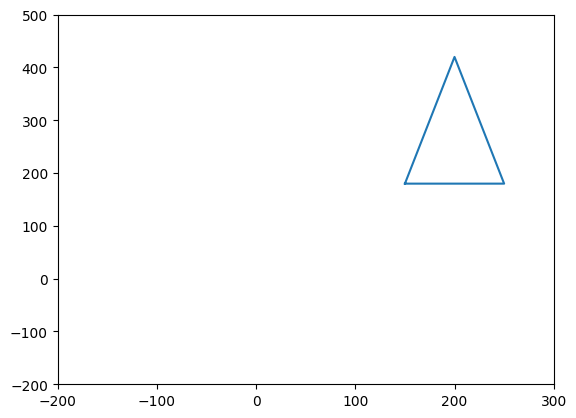

In [ ]:
x = s_[:,0]
y = s_[:,1]
plt.plot(x, y)
plt.ylim([-200, 500])
plt.xlim([-200, 300])

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
### YOUR CODE HERE

In [ ]:
# собственное значение и собственный вектор
res = np.linalg.eig(m)
res

EigResult(eigenvalues=array([ 3., -1.]), eigenvectors=array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]]))

In [ ]:
# собственное значение
res_1 = res[0]
res_1

array([ 3., -1.])

In [ ]:
# собственный вектор
res_2 = res[1]
res_2

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

In [ ]:
res_3 = np.transpose(res_2)
res_3

array([[ 0.89442719,  0.4472136 ],
       [-0.89442719,  0.4472136 ]])

In [ ]:
res_3[0]

array([0.89442719, 0.4472136 ])

In [ ]:
res_3[1]

array([-0.89442719,  0.4472136 ])

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

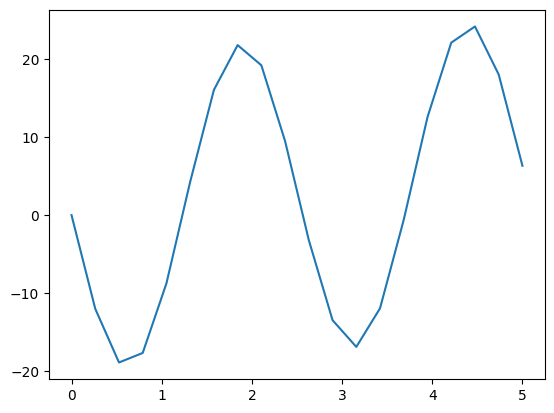

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
### YOUR CODE HERE

In [ ]:
# Границы для параметров
bounds = [(-10, 10), (-10, 10)]

In [ ]:
# Начальные значения параметров
initial_guess = [0, 0]

In [ ]:
# Минимизация функции ошибки
result = differential_evolution(error, bounds)

In [ ]:
# Оптимальные параметры
optimal_params = result.x

print("Оптимальные параметры a и b:", optimal_params)

Оптимальные параметры a и b: [ 3.  -2.5]


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
### YOUR CODE HERE

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Вычисляем матрицу косинусной близости
similarity_matrix = cosine_similarity(raitings)
similarity_matrix

array([[1.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 1.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 1.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 1.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 1.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        1.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 1.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

In [ ]:
# Для каждого пользователя находим наиболее похожего
similar_users = []
for i in range(len(similarity_matrix)):
    # Исключаем самого пользователя из списка похожих
    similarity_row = similarity_matrix[i].copy()
    similarity_row[i] = -1
    most_similar_user = np.argmax(similarity_row)
    similar_users.append((i, most_similar_user))

print(similar_users)

[(0, 8), (1, 4), (2, 9), (3, 9), (4, 8), (5, 9), (6, 3), (7, 5), (8, 0), (9, 2)]
